## Part 1: Get top-5 selling products

In [41]:
# read data

import pandas as pd

historical_demand_csv_path = (
    "C:/Users/hachatur/gd/scratch/sarang_forecast/product_demand.csv"
)
hist_raw_df = pd.read_csv(historical_demand_csv_path)

print("hist_raw_df =")
with pd.option_context("display.max_columns", None, "display.width", 1000):
    print(hist_raw_df)

hist_raw_df =
       Order ID                     Product Quantity Ordered Price Each      Order Date                        Purchase Address
0        141234                      iPhone                1        700  01/22/19 21:25         944 Walnut St, Boston, MA 02215
1        141235    Lightning Charging Cable                1      14.95  01/28/19 14:15        185 Maple St, Portland, OR 97035
2        141236            Wired Headphones                2      11.99  01/17/19 13:33   538 Adams St, San Francisco, CA 94016
3        141237            27in FHD Monitor                1     149.99  01/05/19 20:33      738 10th St, Los Angeles, CA 90001
4        141238            Wired Headphones                1      11.99  01/25/19 11:59           387 10th St, Austin, TX 73301
...         ...                         ...              ...        ...             ...                                     ...
186845   319666    Lightning Charging Cable                1      14.95  12/11/19 20:58  1

hist_df =
                 timestamp                     product  qty   price
0      2019-01-22 21:25:00                      iPhone    1  700.00
1      2019-01-28 14:15:00    Lightning Charging Cable    1   14.95
2      2019-01-17 13:33:00            Wired Headphones    2   11.99
3      2019-01-05 20:33:00            27in FHD Monitor    1  149.99
4      2019-01-25 11:59:00            Wired Headphones    1   11.99
...                    ...                         ...  ...     ...
186845 2019-12-11 20:58:00    Lightning Charging Cable    1   14.95
186846 2019-12-01 12:01:00       AA Batteries (4-pack)    2    3.84
186847 2019-12-09 06:43:00             Vareebadd Phone    1  400.00
186848 2019-12-03 10:39:00            Wired Headphones    1   11.99
186849 2019-12-21 21:45:00  Bose SoundSport Headphones    1   99.99

[185950 rows x 4 columns]


Text(0.5, 1.0, 'price histogram')

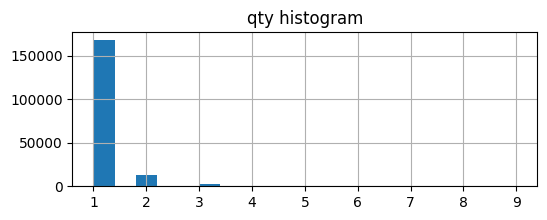

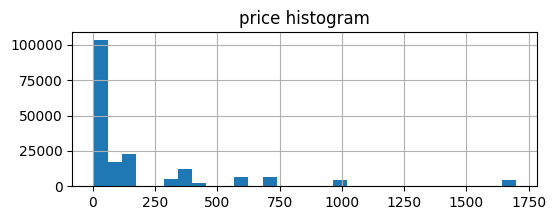

In [42]:
# clean data

import matplotlib.pyplot as plt

# format columns and drop nans
hist_df = hist_raw_df[
    ["Order Date", "Product", "Quantity Ordered", "Price Each"]
].copy().rename(
    columns={
        "Order Date": "timestamp",
        "Product": "product",
        "Quantity Ordered": "qty",
        "Price Each": "price",
    }
)
hist_df["timestamp"] = pd.to_datetime(hist_df["timestamp"], format="%m/%d/%y %H:%M", errors="coerce")
hist_df.dropna(inplace=True)
hist_df["qty"] = hist_df["qty"].astype(int)
hist_df["price"] = hist_df["price"].astype(float)
hist_df.dropna(inplace=True)

print("hist_df =")
with pd.option_context("display.max_columns", None, "display.width", 1000):
    print(hist_df)

# plot histograms of price and quantity to check for outliers
ax = hist_df["qty"].hist(bins=20, ax=plt.subplots(figsize=(6, 2))[1])
ax.set_title("qty histogram")
ax = hist_df["price"].hist(bins=30, ax=plt.subplots(figsize=(6, 2))[1])
ax.set_title("price histogram")


Outlier analysis observations
* 'qty' and 'price' values look outlier-free; no negatives or absurdly large values
* We will skip outlier removal at this stage

In [49]:
# get top-5 products by sales-revenue (sales dollar value)

hist_df["revenue"] = hist_df["qty"] * hist_df["price"]

# group by product and sum revenue
revenue_df = hist_df.groupby("product")["revenue"].sum().sort_values(
    ascending=False
)

print("sales-revenue by product =")
print(revenue_df)

# get top-5 products
top_products = revenue_df.index[:5].to_list()

print(f"\ntop-5-revenue products = {top_products}")

sales-revenue by product =
product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: revenue, dtype: float64

top-5-revenue products = ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor']


## Part 2: Forecast next-week demand of top-5 sellers